In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
# %matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [2]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [3]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
6335,9.72
6336,10.55
6337,10.84
6338,10.89


In [4]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


<Axes: >

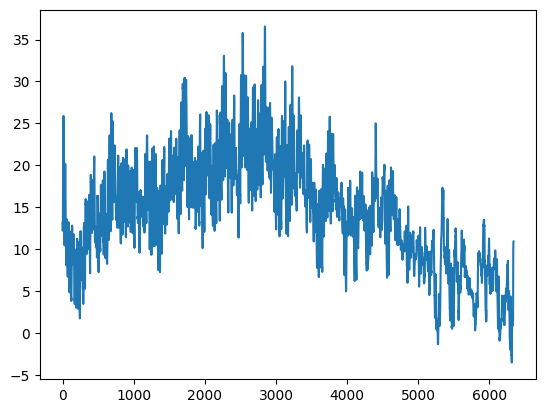

In [5]:
data['temp'].plot()

In [6]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 4, 16, 7, 0)

In [7]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2025, 1, 5, 11, 0))

In [8]:
len(data)

6340

In [9]:
date_time_str

'16/04/24 07:00:00'

In [10]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [11]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19829.29166667, 19829.33333333, 19829.375     , ...,
       20093.33333333, 20093.375     , 20093.41666667])

In [12]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [13]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [14]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
6335,05/01/25 06:00:00,9.72
6336,05/01/25 07:00:00,10.55
6337,05/01/25 08:00:00,10.84
6338,05/01/25 09:00:00,10.89


In [15]:
import warnings
warnings.filterwarnings("ignore")


In [16]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19829.291667  16/04/24 07:00:00
 1     12.20  19829.333333  16/04/24 08:00:00
 2     12.29  19829.375000  16/04/24 09:00:00
 3     12.42  19829.416667  16/04/24 10:00:00
 4     14.54  19829.458333  16/04/24 11:00:00
 ...     ...           ...                ...
 6335   9.72  20093.250000  05/01/25 06:00:00
 6336  10.55  20093.291667  05/01/25 07:00:00
 6337  10.84  20093.333333  05/01/25 08:00:00
 6338  10.89  20093.375000  05/01/25 09:00:00
 6339  10.91  20093.416667  05/01/25 10:00:00
 
 [6340 rows x 3 columns],
 6340)

In [17]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [18]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

19.400000000000016

In [19]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

6316

In [20]:
len(x)

6316

In [21]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

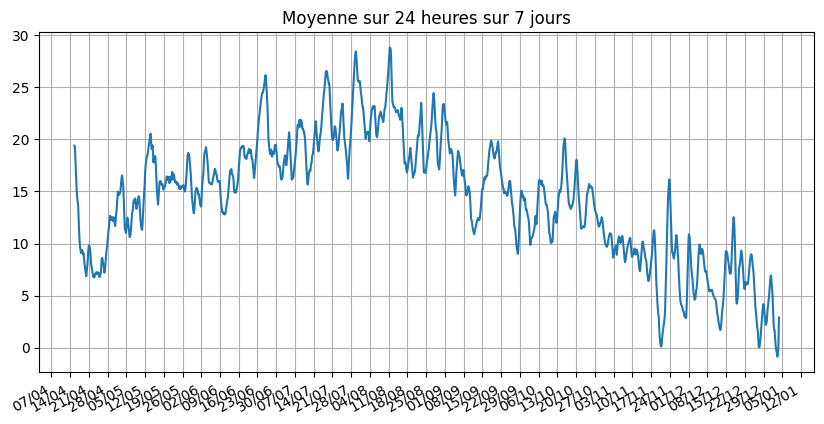

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [23]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=264, seconds=8306, microseconds=350929)

In [24]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [25]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2025, 1, 5, 9, 18, 26, 350929),
 264)

In [26]:
moyenne = data['temp'].mean()
moyenne

14.369823343848603

14.369823343848603

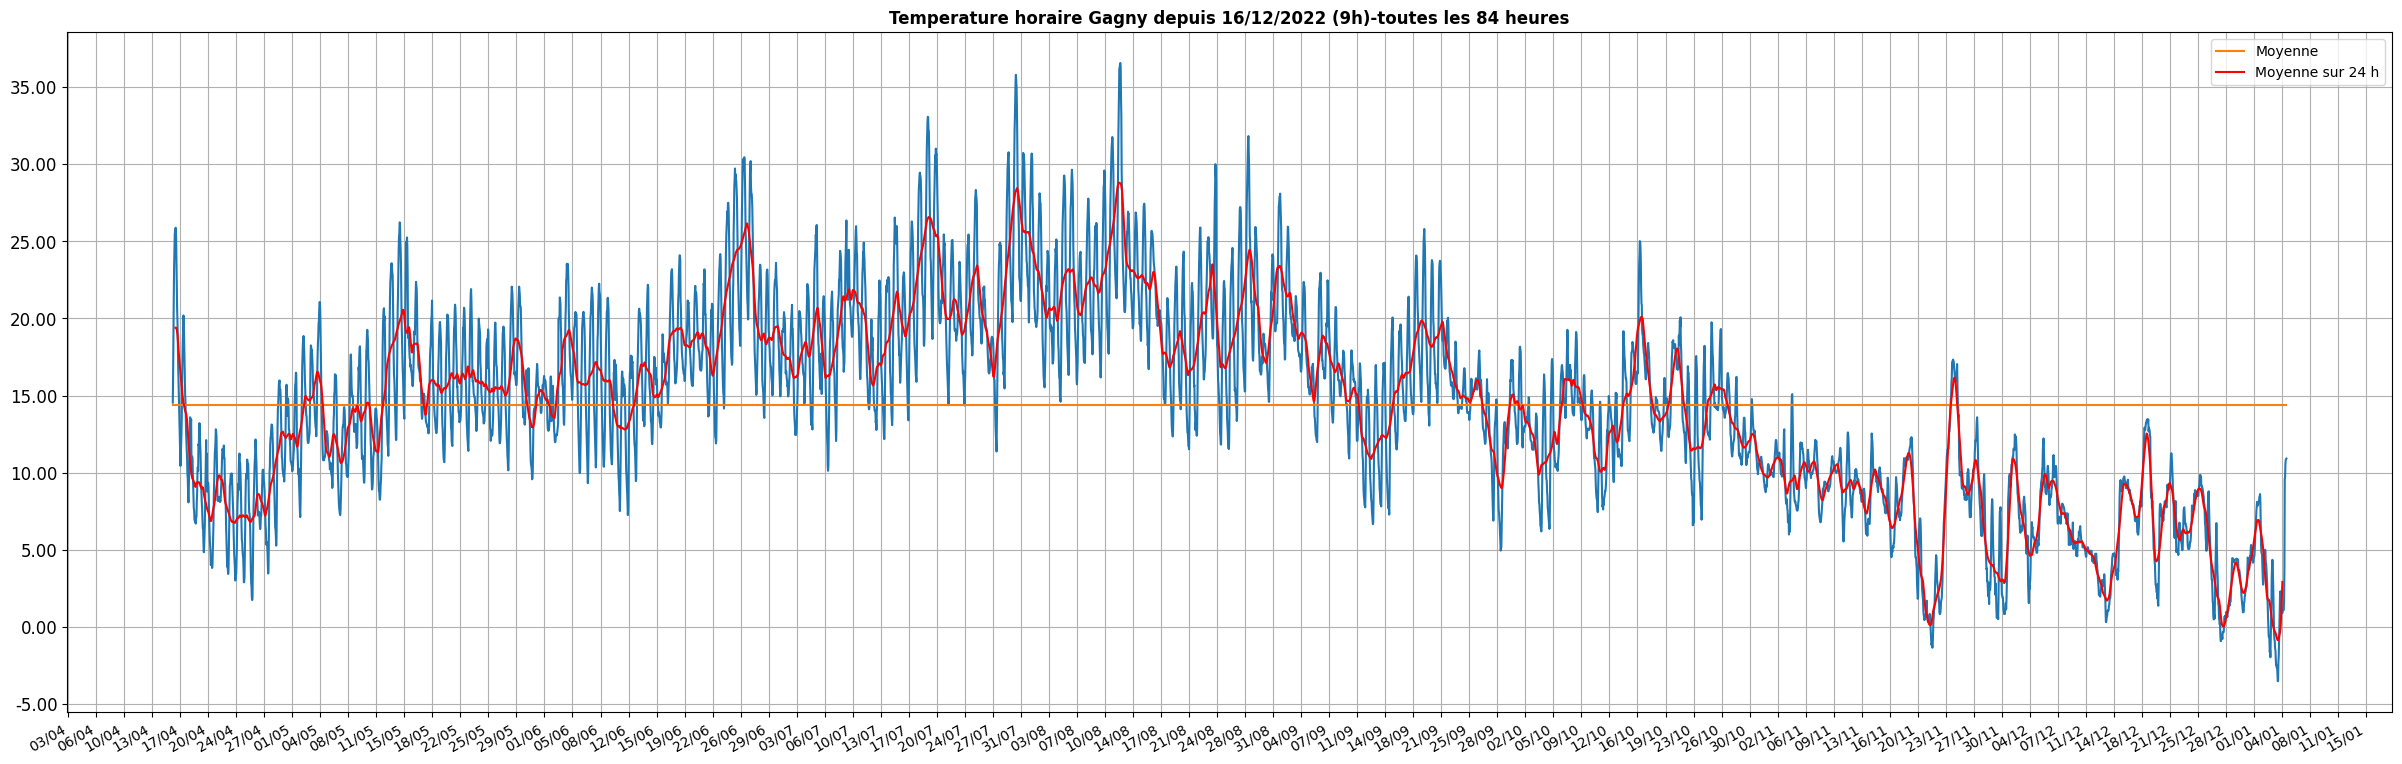

In [27]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [28]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
6335,9.72,20093.250000,05/01/25 06:00:00,0.17
6336,10.55,20093.291667,05/01/25 07:00:00,0.83
6337,10.84,20093.333333,05/01/25 08:00:00,0.29
6338,10.89,20093.375000,05/01/25 09:00:00,0.05


<Axes: >

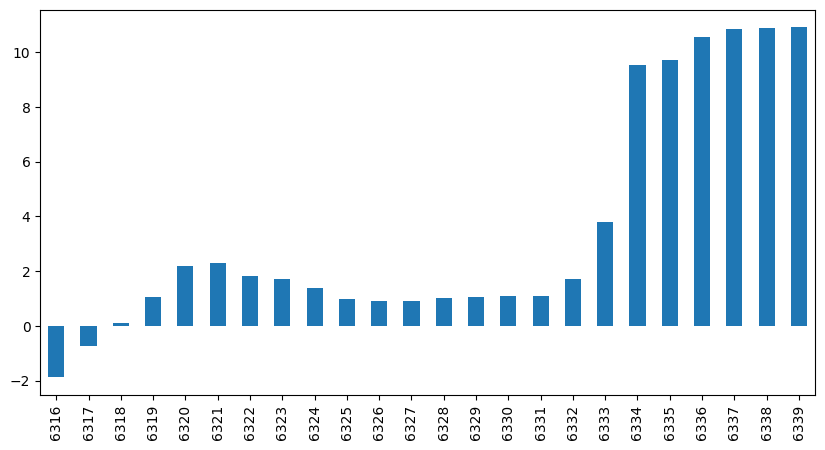

In [29]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

In [30]:
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
6335,9.72,20093.250000,05/01/25 06:00:00,0.17
6336,10.55,20093.291667,05/01/25 07:00:00,0.83
6337,10.84,20093.333333,05/01/25 08:00:00,0.29
6338,10.89,20093.375000,05/01/25 09:00:00,0.05


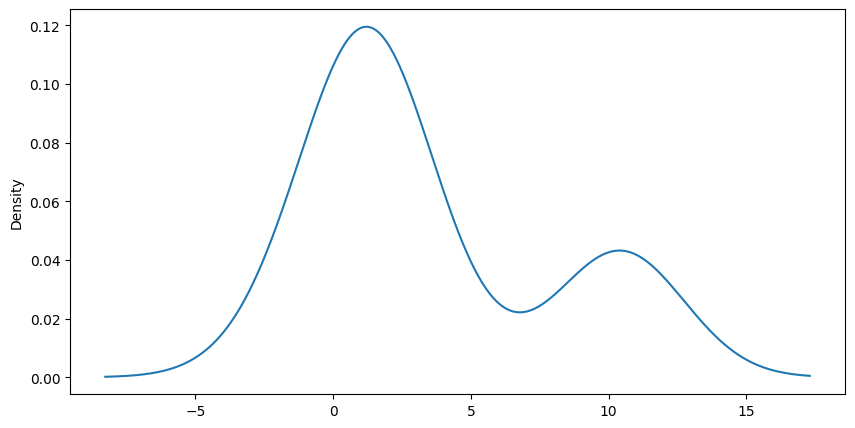

In [31]:
span = 24
try:
    data.tail(span)['temp'].plot.kde(figsize=(10,5))
    #data['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

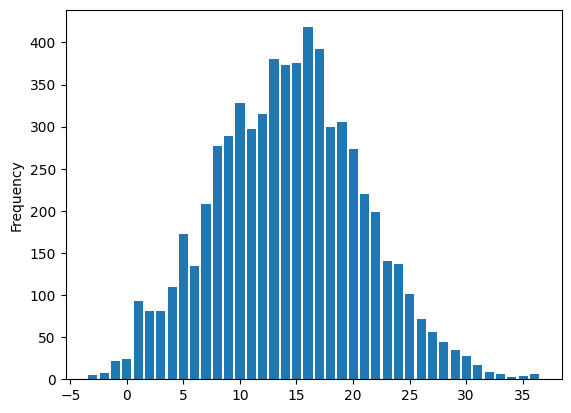

In [32]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

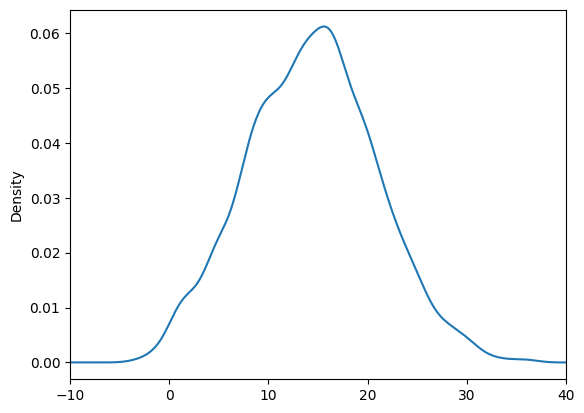

In [33]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

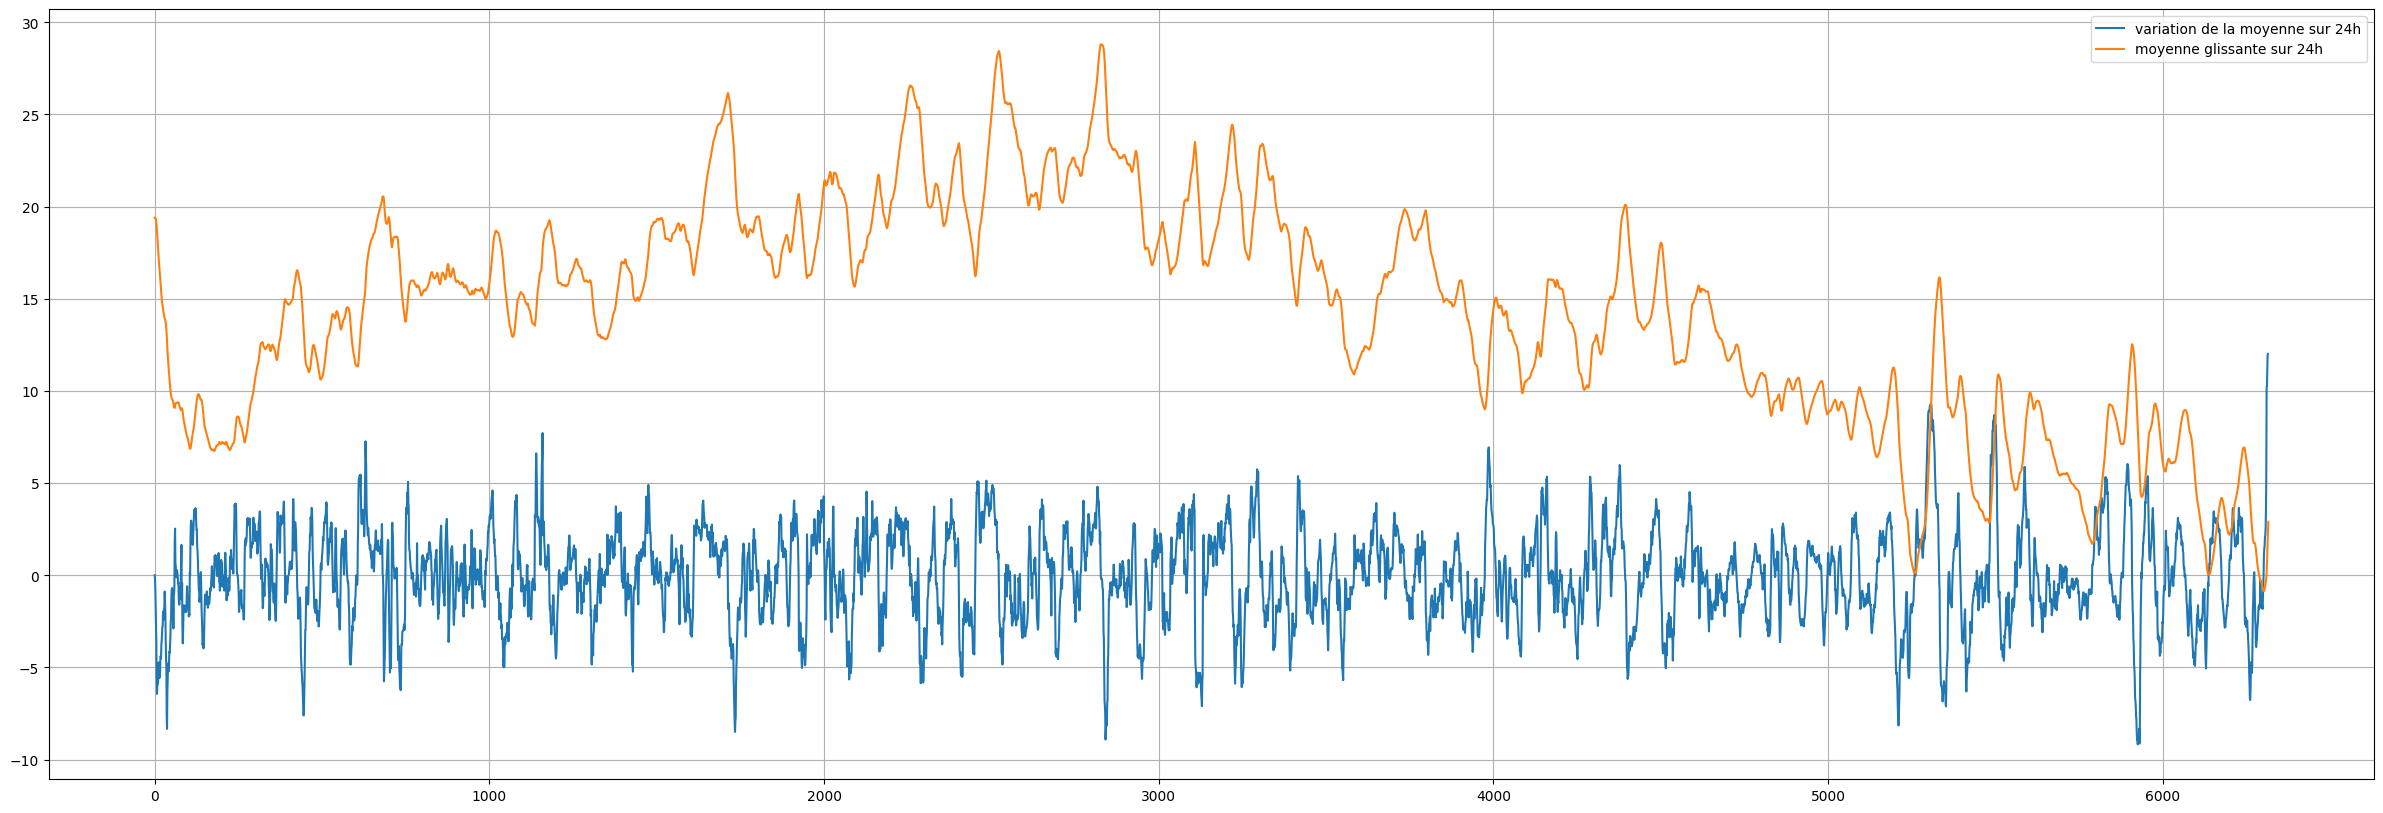

In [34]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [35]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [36]:
window, days, interval

(24, 15, 12)

In [37]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [38]:
h

5980    20078.458333
5981    20078.500000
5982    20078.541667
5983    20078.583333
5984    20078.625000
            ...     
6335    20093.250000
6336    20093.291667
6337    20093.333333
6338    20093.375000
6339    20093.416667
Name: hours, Length: 360, dtype: float64

In [39]:
datetime.now()

datetime.datetime(2025, 1, 5, 9, 18, 38, 933561)

In [40]:
window_start

'21/12/2024, 09:18:38'

In [41]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

4.472027777777798

In [42]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 4.472027777777798)

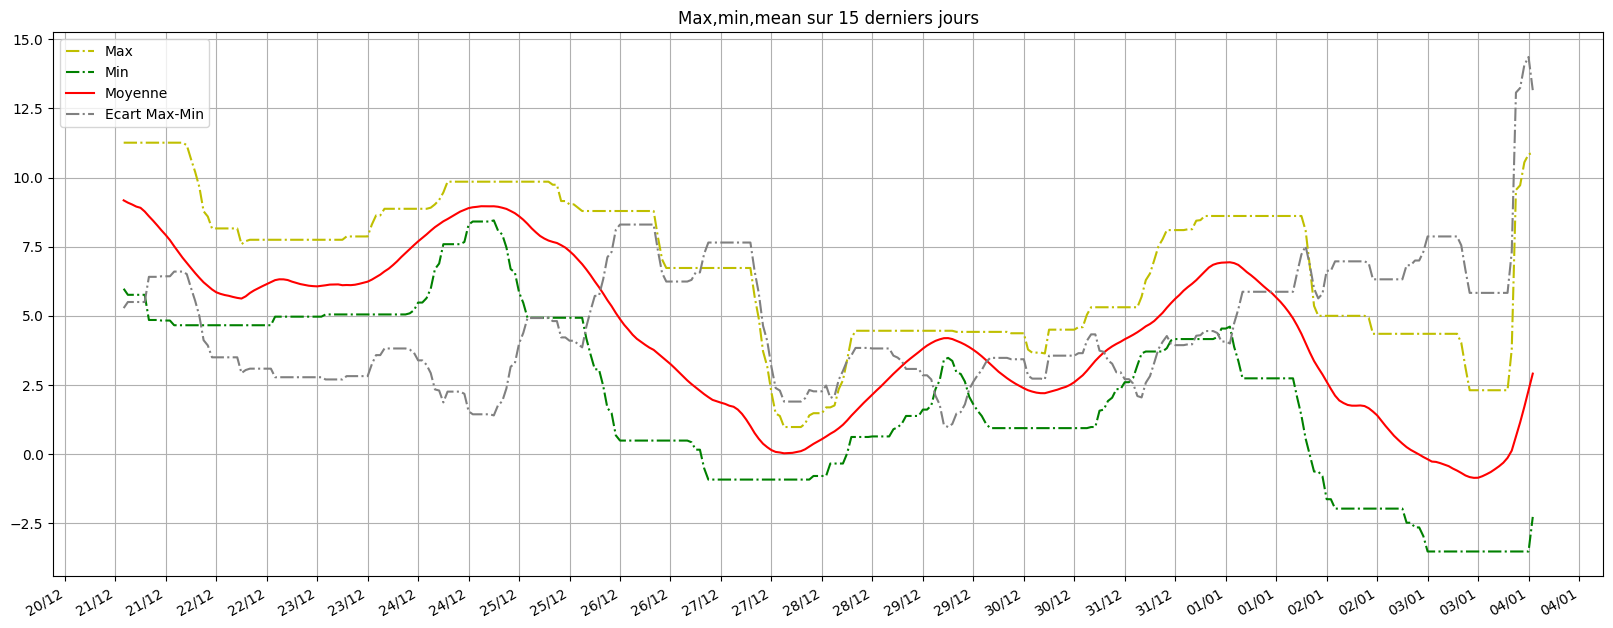

In [43]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [44]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

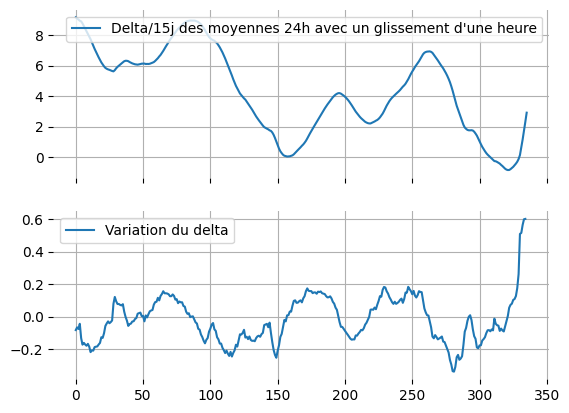

In [45]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [46]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [47]:
# graphical output...
from pylab import sign, diff


In [48]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


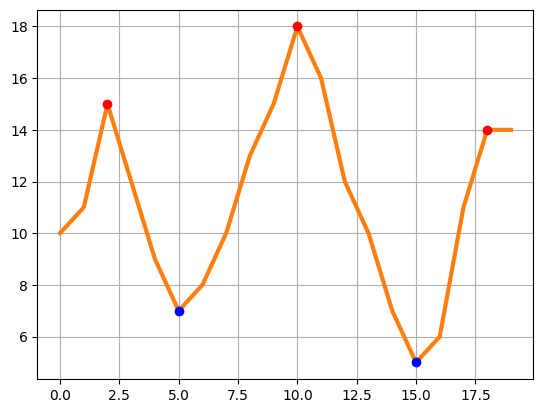

In [49]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [50]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
6172,29/12/24,11,1.76,0.15
6173,29/12/24,12,2.35,0.59
6174,29/12/24,13,2.67,0.32
6175,29/12/24,14,3.41,0.74
6176,29/12/24,15,4.19,0.78
...,...,...,...,...
6335,05/01/25,06,9.72,0.17
6336,05/01/25,07,10.55,0.83
6337,05/01/25,08,10.84,0.29
6338,05/01/25,09,10.89,0.05


In [51]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [52]:
_max - _min

14.43

## Main graph

(4.472027777777798, 15)

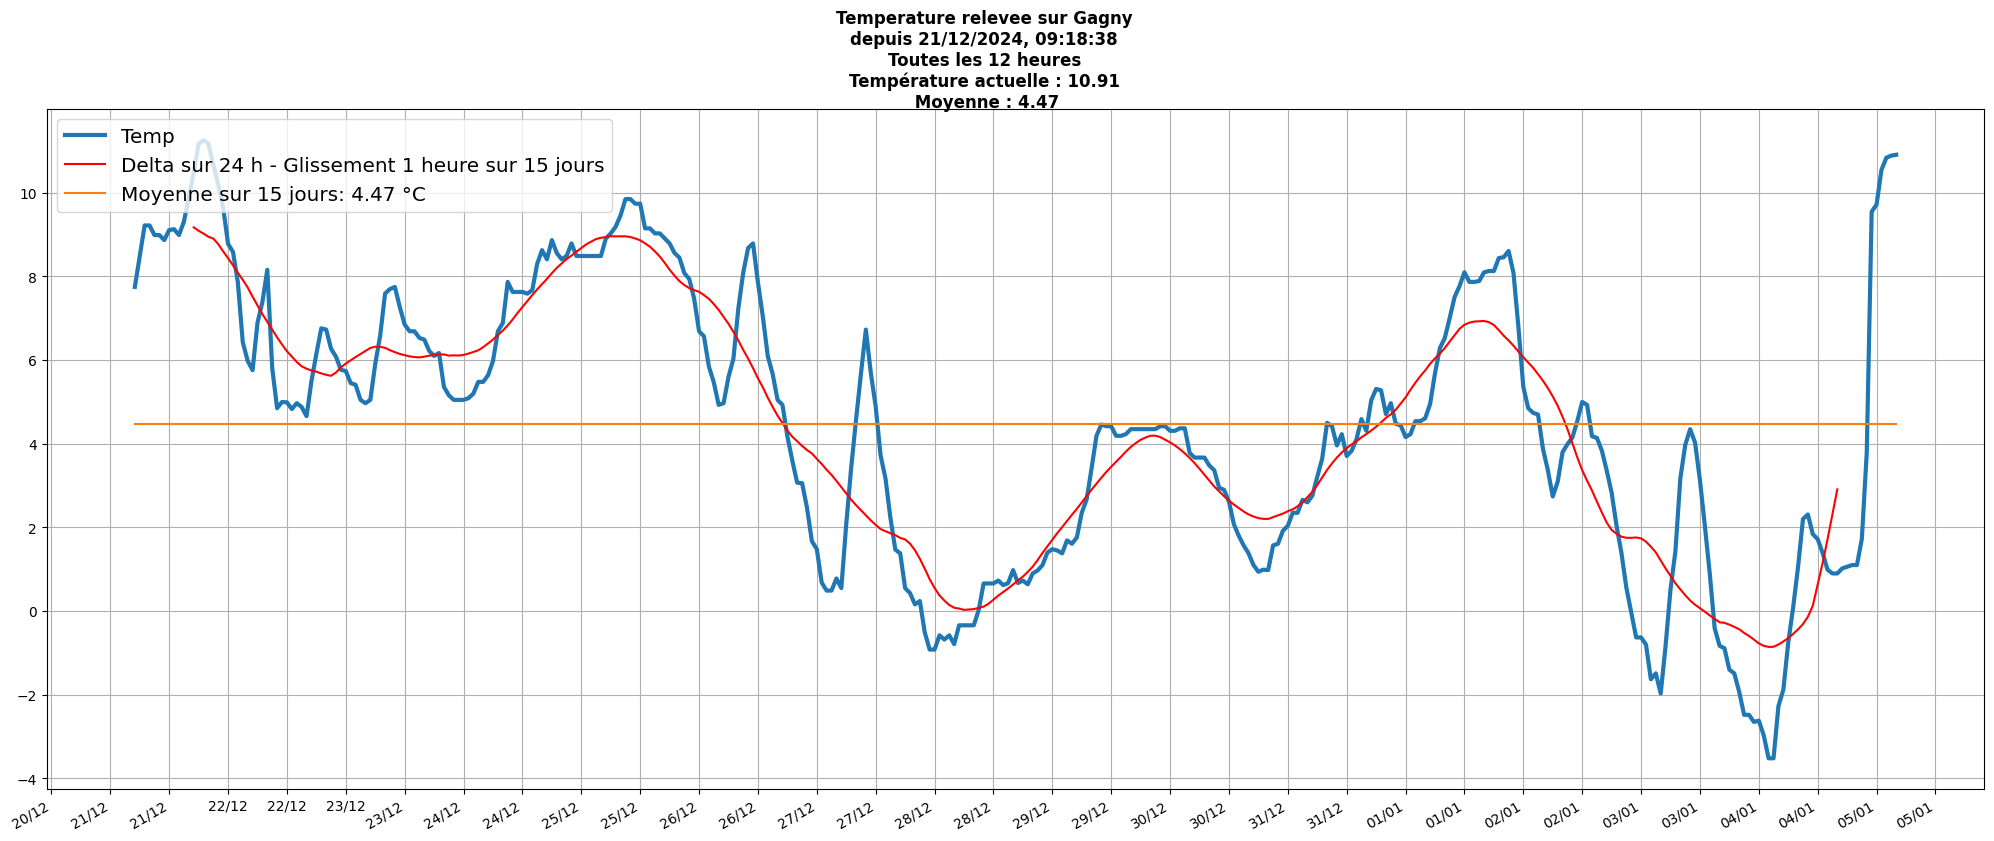

In [53]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [54]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
6335,06,9.72,0.17
6336,07,10.55,0.83
6337,08,10.84,0.29
6338,09,10.89,0.05
6339,10,10.91,0.02


In [55]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

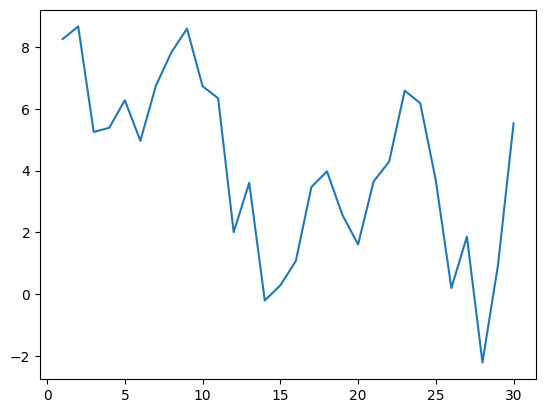

In [56]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

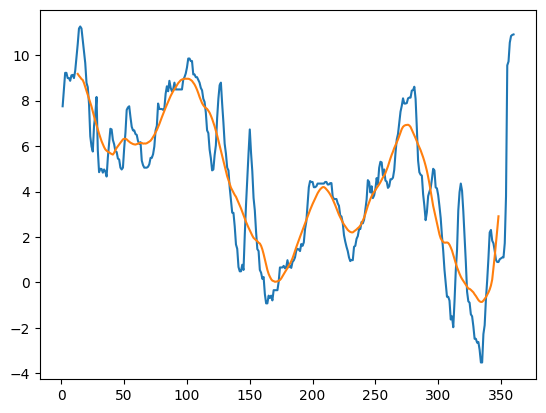

In [57]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x22adc0c0aa0>])

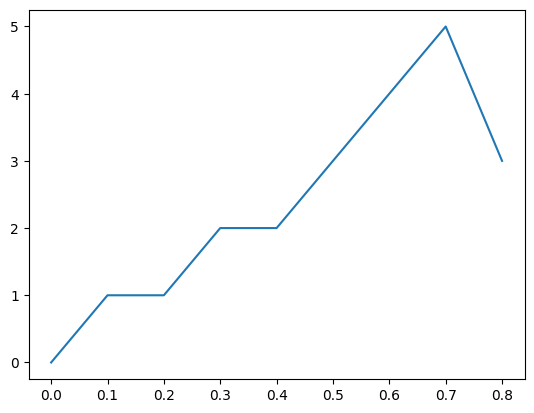

In [58]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x22adc177ef0>])

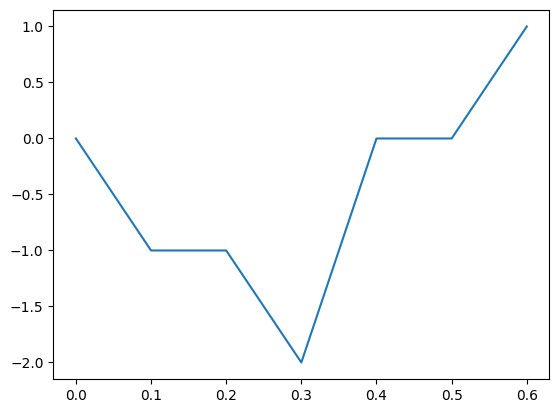

In [59]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [60]:
n = data.tail(1)['dates'].values[0]
n

'05/01/25 10:00:00'

# Température depuis 7 jours par heure

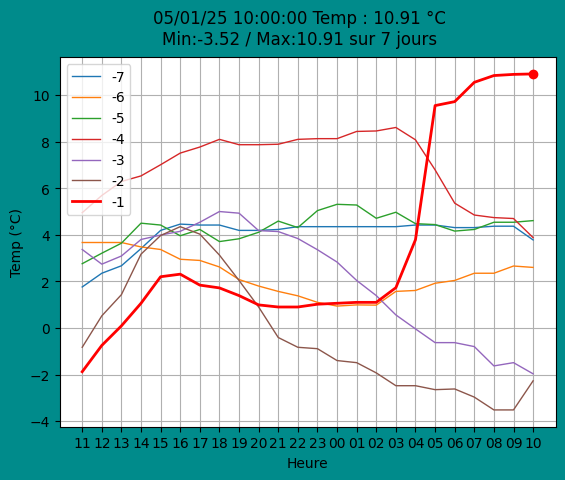

In [61]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()
plt.show()

In [62]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [63]:
max_,min_

(10.910000000000023, -1.879999999999996)

In [64]:
df_jours=data.tail(24*7)
df

[0, -1, -1, -2, 0, 0, 1]

In [65]:
df_jours.groupby('jours')['temp'].mean()

jours
01/01/25    6.040833
02/01/25    5.132083
03/01/25    0.842083
04/01/25   -0.647500
05/01/25    6.476364
29/12/24    3.768462
30/12/24    3.401667
31/12/24    3.013333
Name: temp, dtype: float64

<Axes: xlabel='jours'>

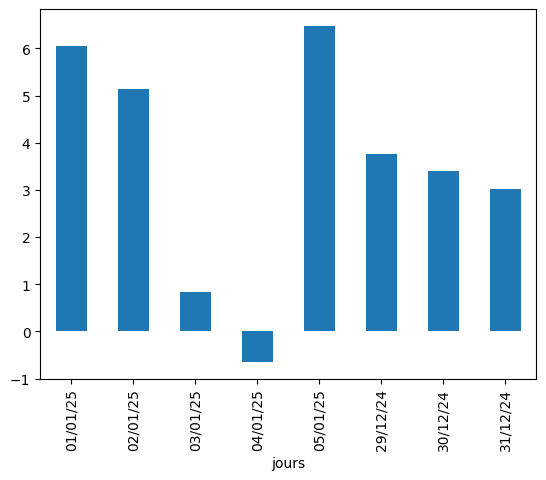

In [66]:
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')

In [67]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [68]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# how to label on top of a bar plot

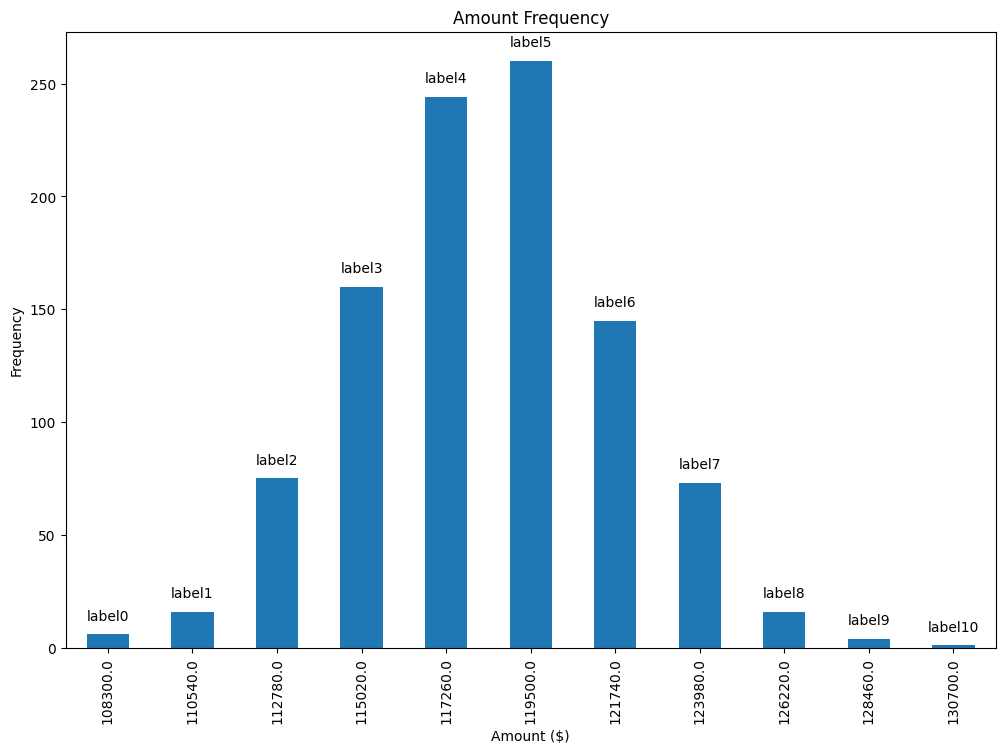

In [69]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [70]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [3.92, 2.32, 4.25, 6.81, 2.19, -0.35, 3.23])

In [71]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
6335,9.72,20093.250000,05/01/25 06:00:00,0.17,06,05/01/25
6336,10.55,20093.291667,05/01/25 07:00:00,0.83,07,05/01/25
6337,10.84,20093.333333,05/01/25 08:00:00,0.29,08,05/01/25
6338,10.89,20093.375000,05/01/25 09:00:00,0.05,09,05/01/25


In [72]:
areas


[3.97, 2.29, 4.27, 6.92, 2.24, -0.27, 3.19]

[Text(-8.0, 0, '-7'),
 Text(-7.0, 0, '-6'),
 Text(-6.0, 0, '-5'),
 Text(-5.0, 0, '-4'),
 Text(-4.0, 0, '-3'),
 Text(-3.0, 0, '-2'),
 Text(-2.0, 0, '-1'),
 Text(-1.0, 0, ''),
 Text(0.0, 0, '')]

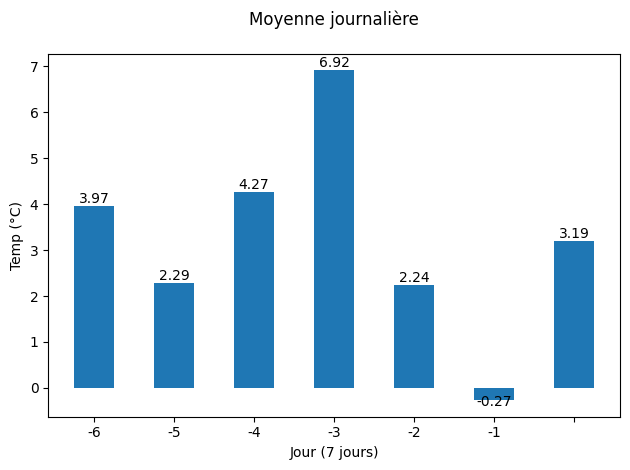

In [73]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )
ax.set_xticklabels(X_axis)


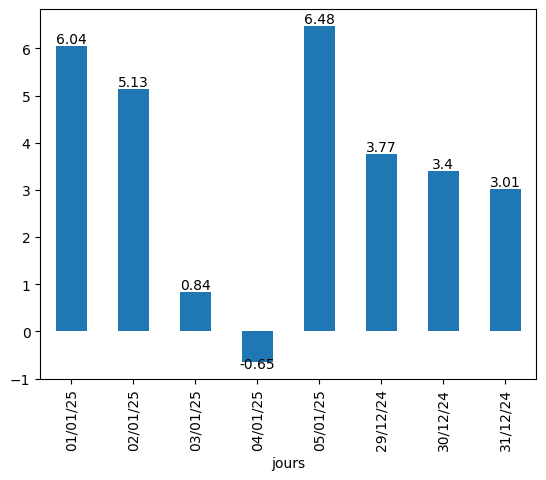

In [74]:
fig, ax = plt.subplots()
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')
rects = ax.patches

# Make some labels.
labels = [round(rects[i].get_height(),2) for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )


In [75]:
labels

[6.04, 5.13, 0.84, -0.65, 6.48, 3.77, 3.4, 3.01]

In [76]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([-1.879999999999996,
  -0.75,
  0.0900000000000318,
  1.0600000000000025,
  2.200000000000045,
  2.3100000000000023,
  1.840000000000032,
  1.7200000000000273,
  1.3900000000000432,
  0.9900000000000092,
  0.9000000000000341,
  0.9000000000000341,
  1.0200000000000389,
  1.0600000000000025,
  1.1000000000000227,
  1.1000000000000227,
  1.7300000000000182,
  3.790000000000021,
  9.550000000000011,
  9.720000000000027,
  10.550000000000011,
  10.840000000000032,
  10.890000000000043,
  10.910000000000023],
 78.51500000000053)

In [77]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

78.51500000000053

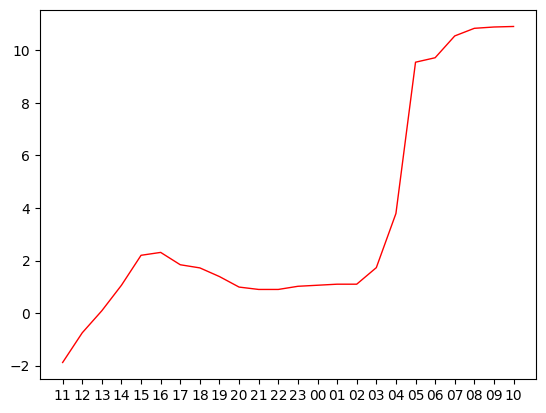

In [78]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [79]:
data.tail()


,temp,hours,dates,variation,heures,jours
6335,9.72,20093.250000,05/01/25 06:00:00,0.17,06,05/01/25
6336,10.55,20093.291667,05/01/25 07:00:00,0.83,07,05/01/25
6337,10.84,20093.333333,05/01/25 08:00:00,0.29,08,05/01/25
6338,10.89,20093.375000,05/01/25 09:00:00,0.05,09,05/01/25
6339,10.91,20093.416667,05/01/25 10:00:00,0.02,10,05/01/25


In [80]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([2.3100000000000023, 1.1000000000000227],
 [-1.879999999999996, 0.9000000000000341, 1.1000000000000227],
 2,
 3)

In [81]:
_diff=[M-m for M,m in zip(_max, _min)]

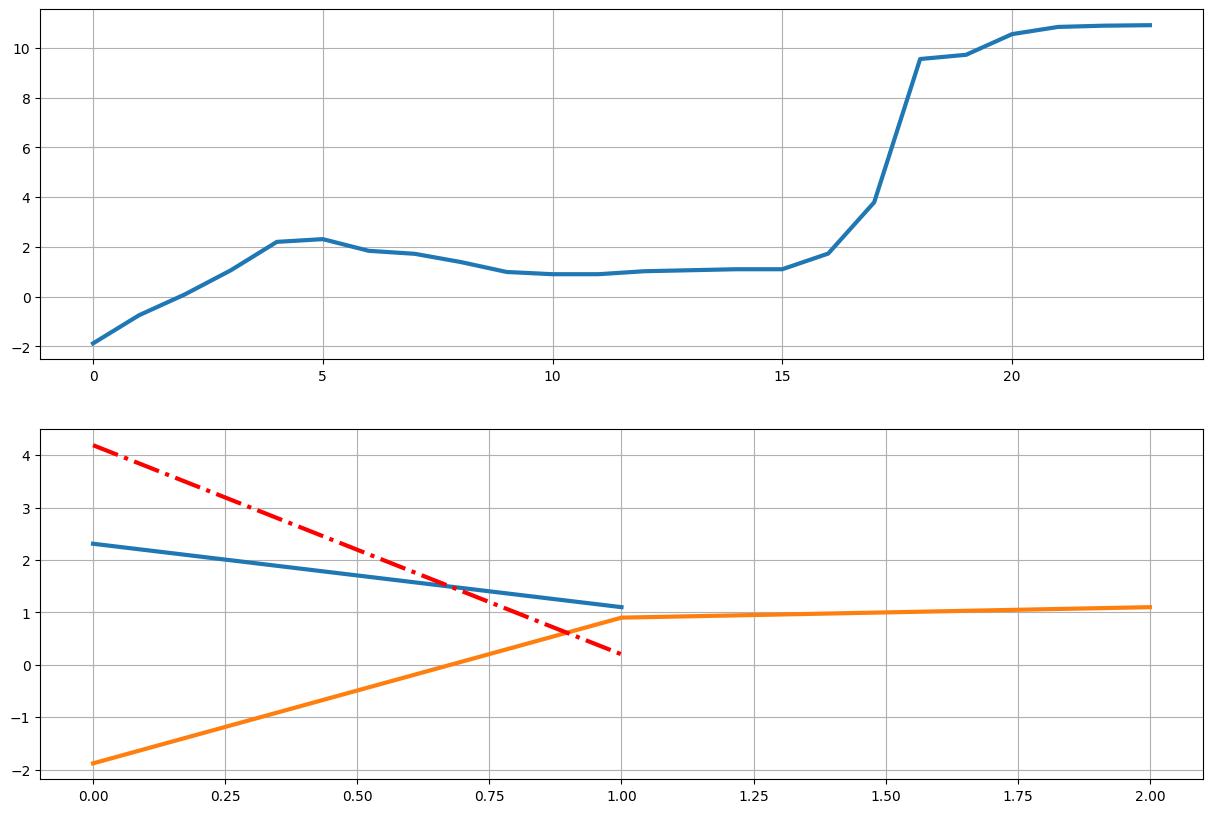

In [82]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [] 0
[] 0 [] 0


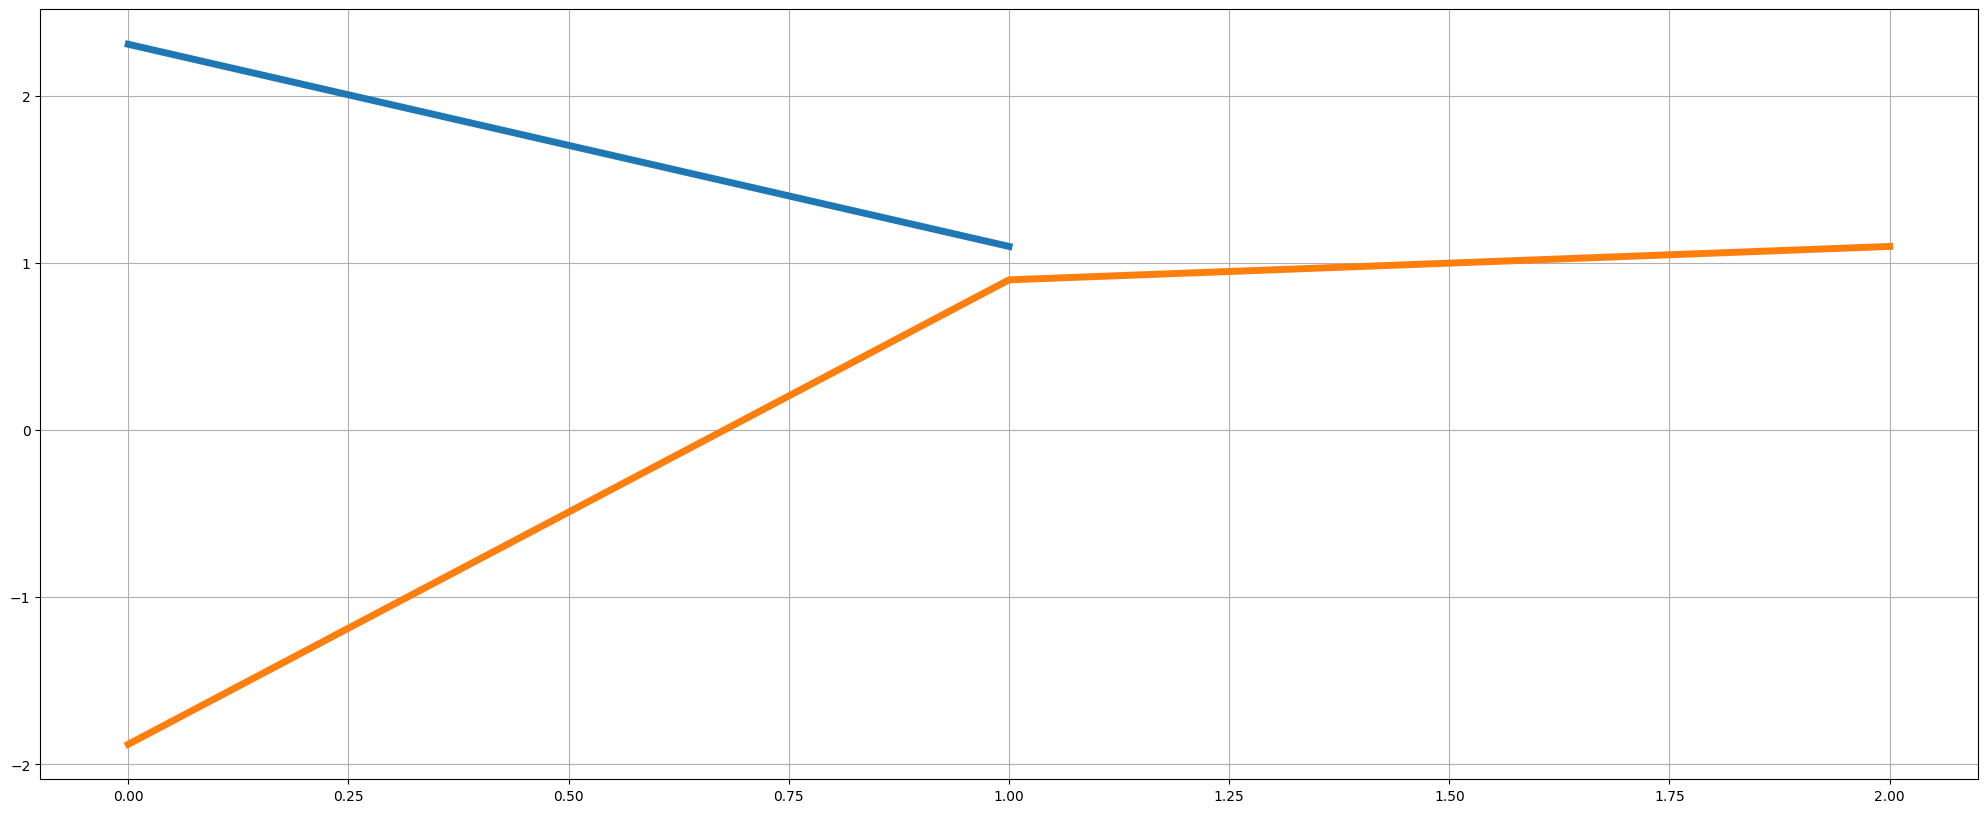

In [83]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [84]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [85]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [86]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [87]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [88]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

# maximas, minimas

[ 5 15] 2 [ 2 10 18] 3


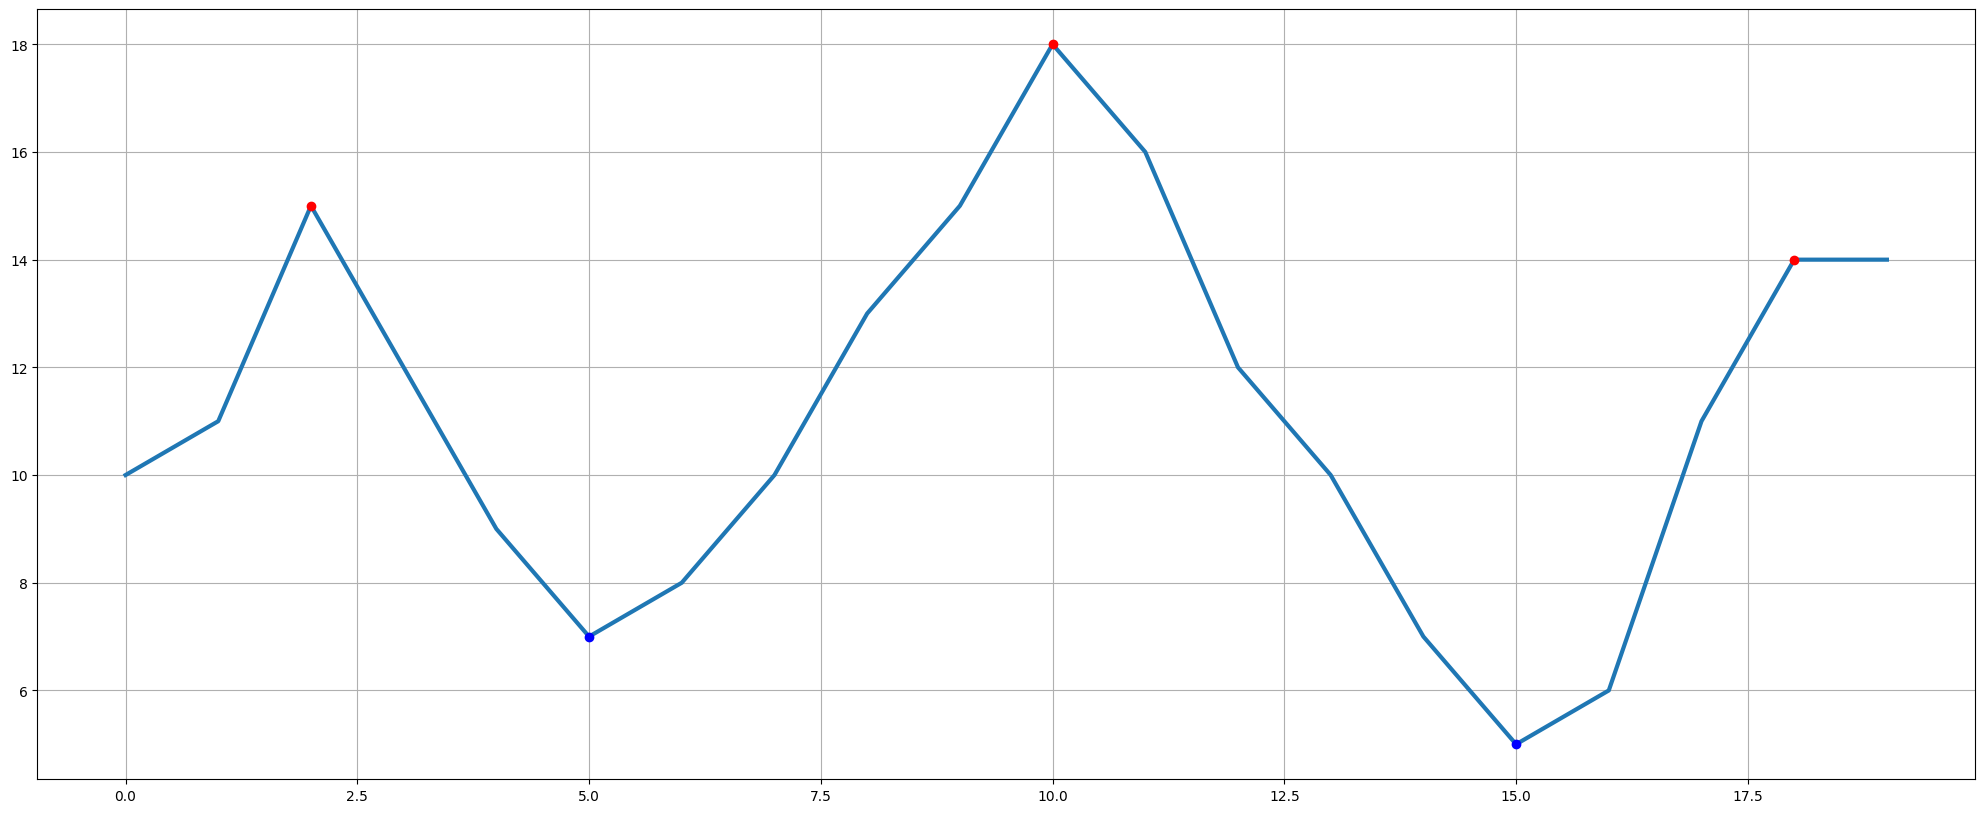

In [89]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [90]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [91]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
6172,1.76,0.736250
6173,2.35,0.823750
6174,2.67,0.935833
6175,3.41,1.061250
6176,4.19,1.217500
...,...,...
6335,9.72,0.634167
6336,10.55,1.148333
6337,10.84,1.711667
6338,10.89,2.310000


# temperature, moyenne, variation

<Axes: >

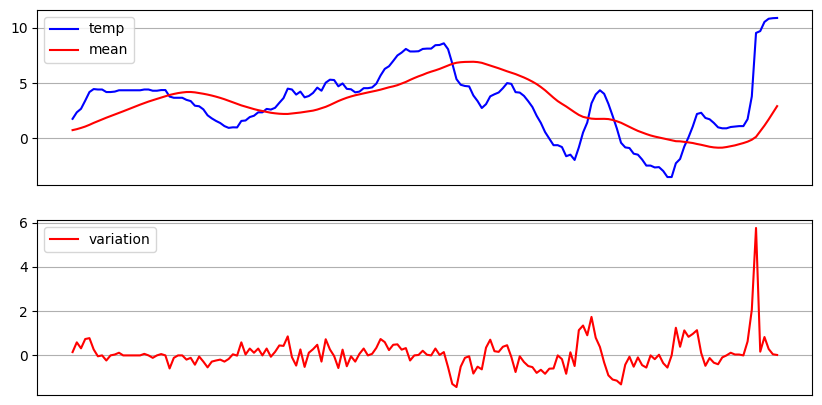

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [93]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(10.910000000000023, -3.519999999999982)

In [94]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [95]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 11.14 7.9 3.24
J -28 10.44 6.69 3.75
J -27 7.94 5.31 2.63
J -26 6.77 4.58 2.19
J -25 6.53 4.54 1.99
J -24 5.16 4.14 1.02
J -23 4.74 1.96 2.78
J -22 3.41 0.31 3.1
J -21 4.77 2.11 2.66
J -20 9.76 4.3 5.46
J -19 9.54 7.43 2.11
J -18 9.42 5.98 3.44
J -17 13.46 9.65 3.81
J -16 9.22 1.37 7.85
J -15 8.15 2.48 5.67
J -14 11.26 5.98 5.28
J -13 8.16 4.66 3.5
J -12 7.75 5.05 2.7
J -11 8.87 5.64 3.23
J -10 9.85 4.93 4.92
J -9 8.79 0.49 8.3
J -8 6.73 -0.92 7.65
J -7 1.69 -0.34 2.03
J -6 4.46 1.76 2.7
J -5 3.67 0.94 2.73
J -4 5.31 2.76 2.55
J -3 8.61 3.88 4.73
J -2 5.0 -1.97 6.97
J -1 4.35 -3.52 7.87
J 0 10.91 -1.88 12.79


<Axes: >

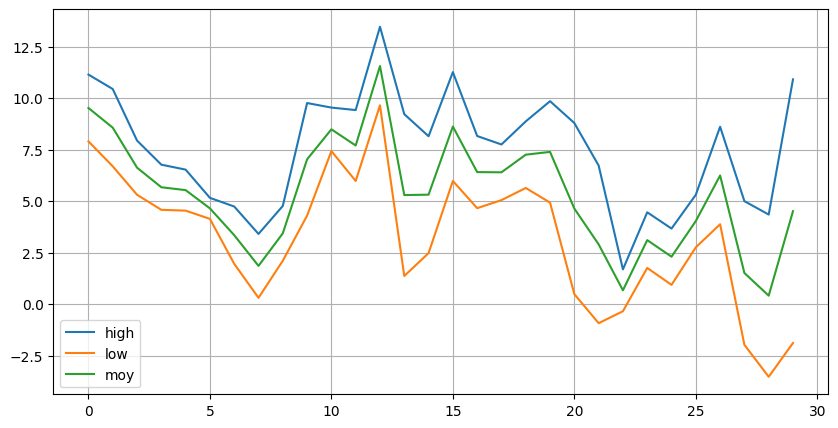

In [96]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [97]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[11.14, 9.76, 13.46, 11.26, 9.85, 4.46, 8.61]

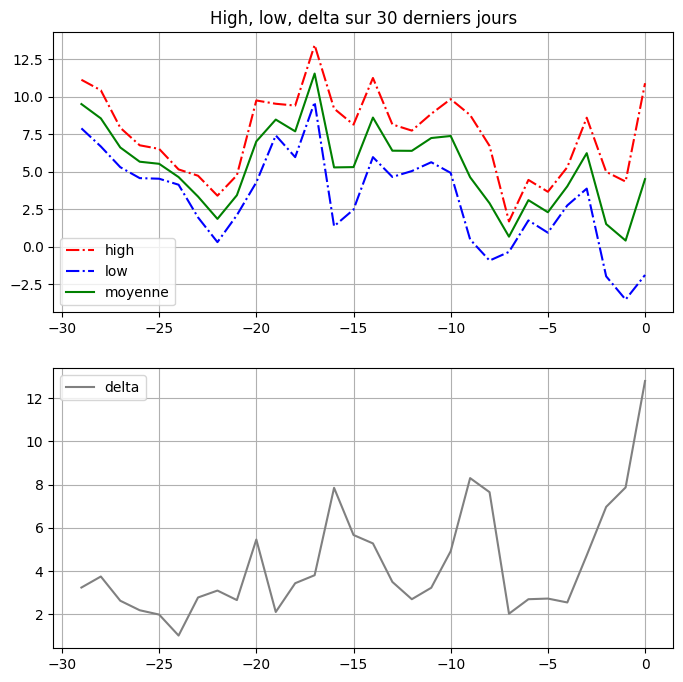

In [98]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       6340 non-null   float64
 1   hours      6340 non-null   float64
 2   dates      6340 non-null   object 
 3   variation  6339 non-null   float64
 4   heures     6340 non-null   object 
 5   jours      6340 non-null   object 
dtypes: float64(3), object(3)
memory usage: 297.3+ KB


In [100]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [101]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [102]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

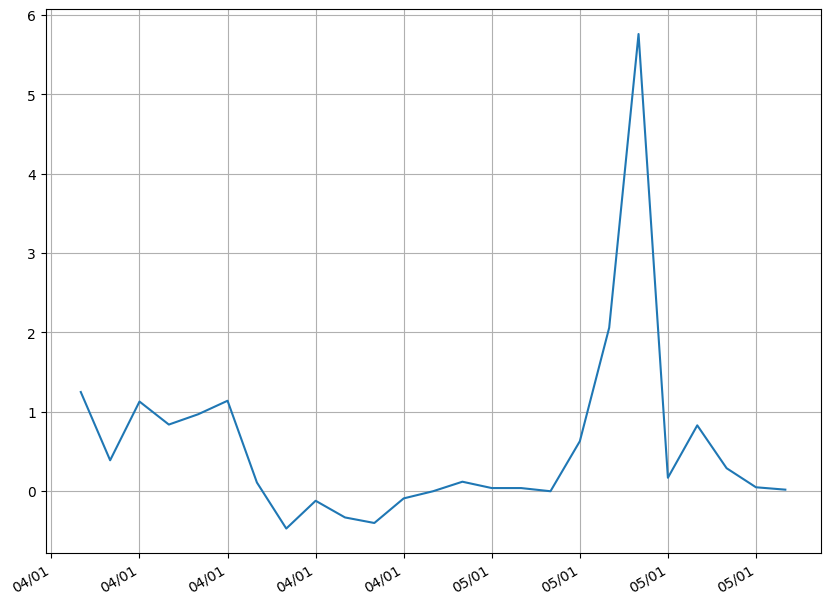

In [103]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [104]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 11.260000000000048, -3.519999999999982)

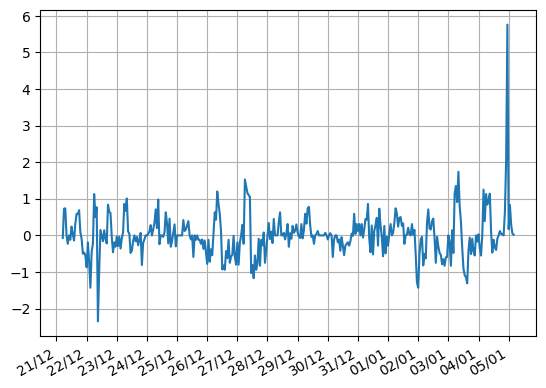

In [105]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [106]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(11.260000000000048,
 522     08/05/24 01:00:00
 4806    02/11/24 13:00:00
 4890    06/11/24 01:00:00
 5322    24/11/24 01:00:00
 5994    22/12/24 01:00:00
 Name: dates, dtype: object)

In [107]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(-3.519999999999982,
 6313    04/01/25 08:00:00
 6314    04/01/25 09:00:00
 Name: dates, dtype: object)

In [108]:
data.tail(w)['temp'].describe()

count    360.000000
mean       4.472028
std        3.334617
min       -3.520000
25%        1.685000
50%        4.490000
75%        7.240000
max       11.260000
Name: temp, dtype: float64

In [109]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('05/01/25 09:18:56', 10.91)

In [110]:
# current date and time
ts = datetime.timestamp(today)
ts

1736065136.329789